## Neural Networks and Computational Intelligence
## Assignment 3

## Libraries

In [1050]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## A - Stochastic Gradient Descent

In [1051]:
class NeuralNetwork:
    def __init__(self, X, K, y):
        self.input = X                                                      # input layer dimensions
        self.K = K                                                          # hidden layer dimensions
        self.weights1 = np.random.rand(self.input.shape[1], self.K)         # first weights 
        self.weights2 = np.ones((self.K, 1))                                # second weights
        self.learning = 0.05
        self.y = y                                                          # expected value
        self.output = np.zeros(self.y.shape)

    def feedforward (self):
        self.layer = np.tanh(np.dot(self.input, self.weights1))             # input -> hidden
        self.output = np.tanh(np.dot(self.layer, self.weights2))            # hidden -> output
        return self.output
    
    def backpropagation(self):

        P = self.input.shape[1]

        E = 1/P * np.sum(pow(self.y - self.output, 2) / 2)

        # derivative2 = np.dot(self.layer.T, pow(self.y - self.output, 2) / 2)
        # derivative1 = np.dot(self.input.T, pow(self.y - self.output, 2) / 2)

        self.weights1 += E * -self.learning
        # self.weights2 += derivative2 * -self.learning

    def train(self, X, y):
        self.output = self.feedforward()
        self.backpropagation()

## B - Regression Problem

Load Data

In [1052]:
xi = np.genfromtxt('xi.csv', delimiter=',')
tau = np.genfromtxt('tau.csv', delimiter=',')

Train Model

In [1053]:
p = len(tau)
epochs = 10000
loss = []
count = []

for i in range(1):
    current_p = random.randint(0, 4999)
    X = xi[:, current_p].reshape(1, 50)
    y = tau[current_p]

    NN = NeuralNetwork(X, 2, y)

    for i in range(epochs):
        # print ("for iteration # " + str(i) + "\n")
        # print ("Input : \n" + str(X))
        # print ("Actual Output: \n" + str(y))
        # print ("Predicted Output: \n" + str(NN.feedforward()))
        # print ("Loss: " + str(np.mean(np.square(y - NN.feedforward()))))
        # print ("\n")

        NN.train(X, y)
        loss.append(np.mean(np.square(y - NN.feedforward())))
        count.append(i)

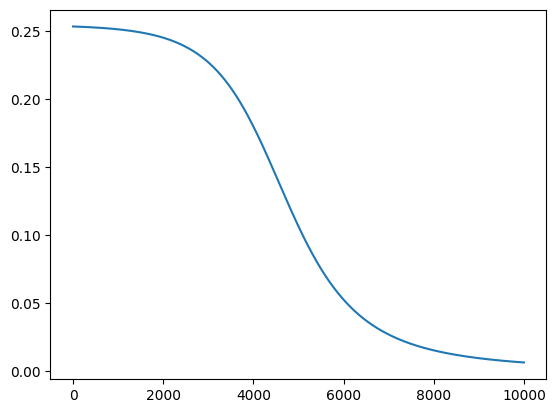

In [1054]:
plt.plot(count, loss)
plt.show()